<a href="https://colab.research.google.com/github/then00bprogrammer/Deep-Learning-Projects-and-Experiments/blob/main/NeuralNetwork01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intro to Regression with Neural Networks in TensorFlow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


Creating data to view and fit

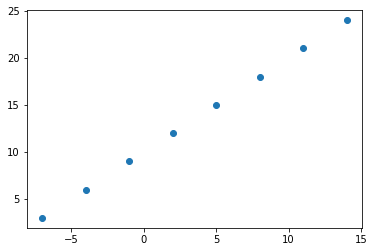

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Create Features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create Labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualize it
plt.scatter(X,y)


In [ ]:
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

#Input and Output Shapes

In [ ]:
#Create a demo tensor for out housing price prediction problem
house_info=tf.constant(['bedroom','bathroom','garage'])
house_price=tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape=X.shape
output_shape=y.shape
input_shape,output_shape


((8,), (8,))

In [ ]:
X[0].ndim

0

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
#Turn our numpy arrays into tenses
X=tf.constant(X)
y=tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
X[0].shape,y[0].shape

(TensorShape([]), TensorShape([]))

#Steps in modelling with TensorFlow

1. **Create a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compile a model** - define the loss function(tells us how wrong our model is) and optimizer(tells our model how to improve patterns) and evaluation metrics(what we can use to interpret the performance of our model).
3. **Fitting a model**- letting the mosel try to find patterns b/w X and y.

In [ ]:
#Set random seed
tf.random.set_seed(42)

In [ ]:
from tensorflow.python import metrics
#Create A MODEL

#1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"]
              ) #maE = MEAN ABSOLUTE ERROR
#SGD is Stochastic gradient descent


#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)




Epoch 1/5
1/1 [==============================] - 1s 989ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
#Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
model.predict([17.0])

array([[12.716021]], dtype=float32)

#Improving Our Model

We can improve our model, by alt  ering the steps we took to create a model.
1. **Create a model**- here we might add more layers, increase the number of hidden units(also called neurons) within each of the hidden layer, change the activation function of each layer.

2. **Compiling the model**- here we might alter the optimization function or perhaps the **learning rate** of the optimzation function.
3. **Fitting the model**- here we might fit a model for more **epochs**(leave it for traininf longer) or on more data(give the model more examples to learn from)

##Rebuilding the Model

In [ ]:
# 1. Create a Model
model= tf.keras.Sequential(
    [tf.keras.layers.Dense(100,activation=None),
     tf.keras.layers.Dense(1)]
)

#2. Compile the Model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras
              .optimizers.Adam(lr=0.01),
              metrics=["mae"])

#3. Fit the Model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 650ms/step - loss: 14.6302 - mae: 14.6302
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 13.6545 - mae: 13.6545
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.6828 - mae: 12.6828
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.7088 - mae: 11.7088
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.7265 - mae: 10.7265
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 9.7303 - mae: 9.7303
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.7154 - mae: 8.7154
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 7.6770 - mae: 7.6770
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 6.6850 - mae: 6.6850
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 6.8416 - mae: 6.8416
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 

In [ ]:
model.predict([17.0])

array([[26.718159]], dtype=float32)

##Evaluating a Model

In [ ]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

##Split data into training/test set

In [ ]:
# Check how many samples we have
len(X)

50

In [ ]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

##Visualizing the data

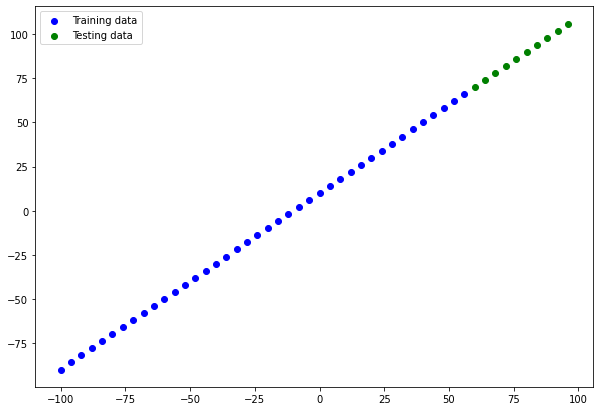

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting 

In [ ]:
# model.summary()

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1],name='input_layer'), # define the input_shape to our model
  tf.keras.layers.Dense(1, input_shape=[1],name='output_layer')
],name='first_model')

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
# This will work after specifying the input shape
model.summary()

Model: "first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets

In [ ]:
model.summary()

Model: "first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


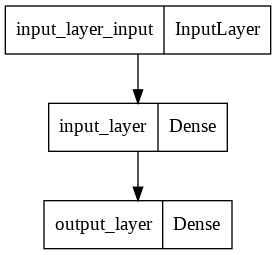

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model)

##Visualizing our Model's Predictions

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66626 ],
       [107.253975],
       [111.841705]], dtype=float32)

In [ ]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

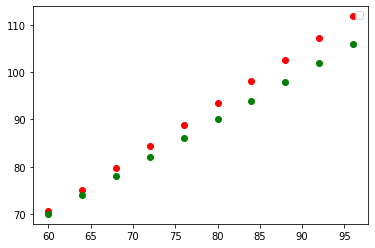

In [ ]:
plt.scatter(X_test,y_pred,c='r')
plt.scatter(X_test,y_test,c="g")
plt.legend()

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training Data")
  #Plot testing data in green
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  #Plot model's prediction in red
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  #Show the legend
  plt.legend()


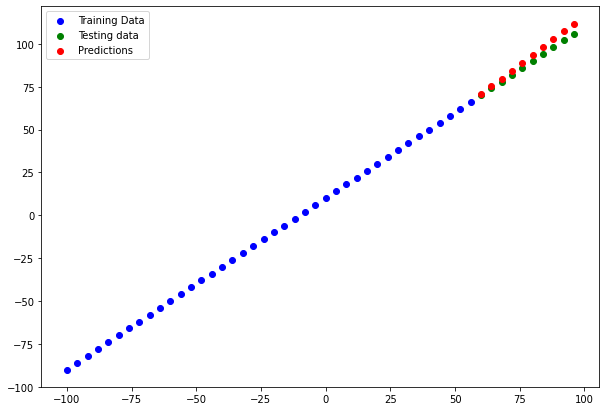

In [ ]:
plot_predictions()

##Evaluation Metrics

In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 269ms/step - loss: 3.1969 - mae: 3.1969


[3.196946620941162, 3.196946620941162]

In [ ]:
#Calculating the mean absolute error

In [ ]:
def getMae(y_true=y_test,y_pred=tf.squeeze(y_pred)):
  return tf.metrics.mean_absolute_error(y_true=y_true,y_pred=y_pred)

In [ ]:
getMae()

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>

In [ ]:
def getMse(y_true=y_test,y_pred=tf.squeeze(y_pred)):
  return tf.metrics.mean_squared_error(y_true=y_true,y_pred=y_pred)

In [ ]:
tf.random.set_seed(42)

In [ ]:
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1],name='output_layer')
])
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 19ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 14ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/s

In [ ]:
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1],name="hidden_layer"),
    tf.keras.layers.Dense(1,input_shape=[1],name='output_layer')
])
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 48.4329 - mae: 48.4329
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 31.3826 - mae: 31.3826
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 36.2157 - mae: 36.2157
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 28.3086 - mae: 28.3086
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 15.3864 - mae: 15.3864
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 12.2199 - mae: 12.2199
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.5217 - mae: 11.5217
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 11.2331 - mae: 11.2331
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 42.0800 - mae: 42.0800
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 29.2675 - mae: 29.2675
Epoch 11/100
2/2 [==============================] - 0s 

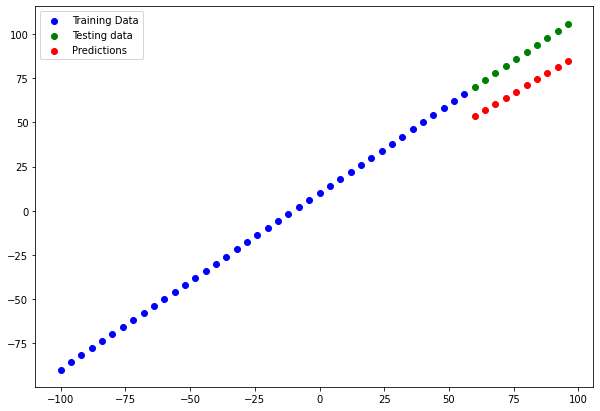

In [ ]:
y_preds_1=model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
#Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#One hot encoding our dataframe
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]

In [ ]:
# import math
# breaking_point=math.floor(len(X)*0.8)
# X_train=X[:breaking_point]
# X_test=X[breaking_point:]

# y_train=y[:breaking_point]
# y_test=y[breaking_point:]

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [ ]:
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)
history=model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 3ms/step - loss: 13179.0000 - mae: 13179.0000
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 12949.7783 - mae: 12949.7783
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 12519.0156 - mae: 12519.0156
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 11750.7373 - mae: 11750.7373
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 10566.4482 - mae: 10566.4482
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 9177.0303 - mae: 9177.0303
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 7998.9497 - mae: 7998.9497
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 7476.4287 - mae: 7476.4287
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 7387.5571 - mae: 7387.5571
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 7364.7578 - mae:

In [ ]:
model_3.evaluate(X_test,y_test)

11/11 [==============================] - 0s 2ms/step - loss: 3688.7021 - mae: 3688.7021


[3688.7021484375, 3688.7021484375]

Text(0.5, 0, 'epochs')

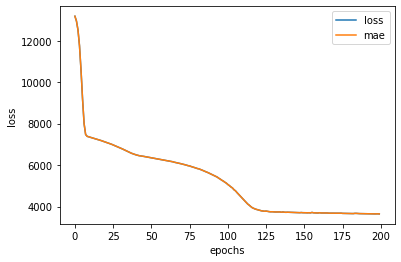

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

##Preprocessing Data(normalization and standardization)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data we can borrow some classes from Scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

#Create X & y
X=insurance.drop("charges",axis=1)
y=insurance["charges"]

#Spilliting into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)


In [ ]:
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [ ]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

Our data has been normalized and one hot encoded. Let's build a neural network model on it to see how it goes.

In [ ]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)

model.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

model.fit(X_train_normal,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 5ms/step - loss: 13343.6592 - mae: 13343.6592
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 13335.6182 - mae: 13335.6182
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 13315.5479 - mae: 13315.5479
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 13272.5645 - mae: 13272.5645
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 13195.1699 - mae: 13195.1699
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 13072.3174 - mae: 13072.3174
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 12893.6680 - mae: 12893.6680
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 12649.2529 - mae: 12649.2529
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 12329.2383 - mae: 12329.2383
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 11928.62

In [ ]:
model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3164.3254 - mae: 3164.3254


[3164.325439453125, 3164.325439453125]